<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise6_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 4- Same as 3, again using Monte-Carlo cross-validation with 50 iterations of 80/20%
splits into training/test set data points, but using StratifiedShuffleSplit to ensure that we the
roughly same number of males and females occur in the training, as well as ensuring
male/female-balance in each drawn test set (the same ratio of the two classes).

In [ ]:
!pip install nilearn

In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# We prepare the model with the required parameters and the cross-validator
logreg = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga')
montecarlo = StratifiedShuffleSplit(n_splits=50, test_size=.20)

In [ ]:
# We define the iterating variable
ROIs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
k_scores = []

In [ ]:
for x in ROIs:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(x)) # We iterate through the number of ROIs
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

    X, y = input_variables, output_variable
    X = scaler.fit_transform(X)

    scores = cross_val_score(logreg, X, y, cv=montecarlo)
    scores = np.multiply(scores, 100) 
    k_scores.append(scores) # We store the scores

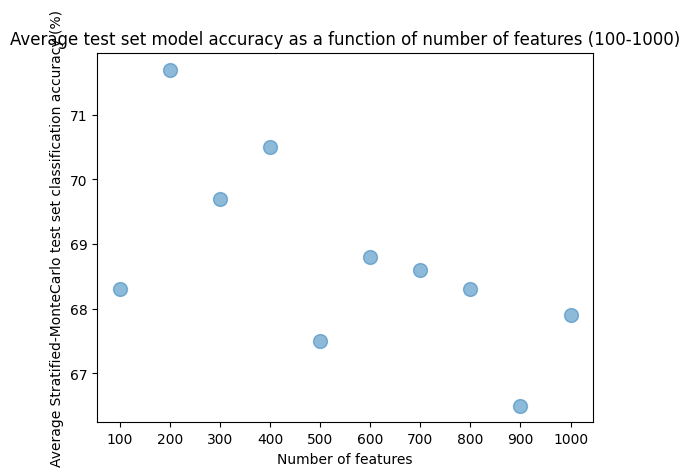

In [ ]:
mean_scores = mean(k_scores,axis=1)

# We're ready to plot
plt.style.use("default")
plt.scatter(ROIs,mean_scores, s=100, alpha = 0.5)
plt.gca().set(
    title="Average test set model accuracy as a function of number of features (100-1000)",
    xlabel="Number of features",
    ylabel="Average Stratified-MonteCarlo test set classification accuracy (%)",
    xticks = (ROIs)
)
plt.show()

Using stratified-MonteCarlo cv, we observe that the 400-roi version of our model is now second-best and not too far off from the 200-roi version, which is the one with marginally higher accuracy.  